PROBLEM STATEMENT : The problem statement for ANN classification on  the Titanic dataset is to predict whether a passenger survived or not based on their features such as age, gender, class, and fare. The goal is to build a binary classification model that can accurately classify a new passenger as either having survived or not survived based on their features.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


here, we are mount our Google Drive in Google Colaboratory 

IMPORTING THE LIBRARIES


importing Necessary libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


1.PANDAS:pandas (imported as pd) is a library for data manipulation and analysis, particularly for working with tabular data (e.g. data stored in spreadsheets or databases).
2.NUMPY:numpy (imported as np) is a library for numerical computing in Python. It provides efficient tools for working with arrays and matrices, as well as various mathematical functions and algorithms.
3.MATPLOTLIB:matplotlib is a library for creating static, interactive, and animated visualizations in Python. It provides tools for creating various types of plots and charts, including line plots, scatter plots, bar plots, histograms, and more.
4.SEABORN:seaborn is a library for statistical data visualization. It provides
a high-level interface for creating aesthetically pleasing and informative visualizations of complex data.

READING THE DATA SET


In [ ]:
dataset_train=pd.read_csv('/content/drive/MyDrive/titanic datasetr/train.csv')

In [ ]:
dataset_train.shape

(891, 12)

In [ ]:
dataset_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset_train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
dataset_train.shape

(891, 12)

In [ ]:
dataset_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

EXPLORATORY DATA ANALYSIS

checking missing data


In [ ]:
dataset_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

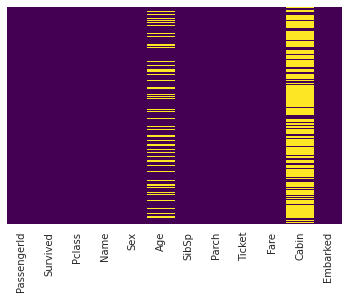

In [ ]:
sns.heatmap(dataset_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

dataset_train.isnull()': This returns a dataframe of boolean values where 'True' indicates a null value.

'yticklabels = False': This removes the y-axis tick labels from the heatmap.

'cbar = False': This removes the colorbar from the heatmap.

'cmap = 'viridis'': This sets the color map to 'viridis', which is a popular color map in seaborn.

A heatmap that displays the null values in the 'train_df' dataframe using a color scheme where yellow indicates missing values, and blue indicates non-missing values.

In [ ]:
dataset_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
dataset_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:xlabel='Survived', ylabel='count'>

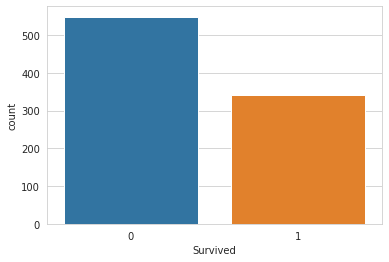

In [ ]:
sns.countplot(x="Survived",data=dataset_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

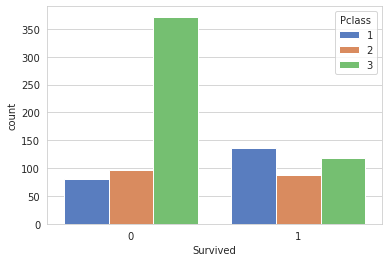

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=dataset_train,palette='muted')

<AxesSubplot:xlabel='Survived', ylabel='count'>

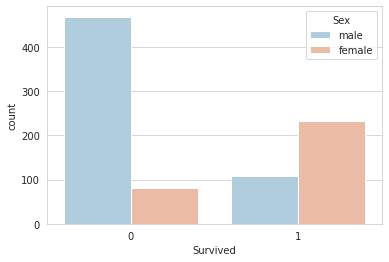

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=dataset_train,palette='RdBu_r')

<AxesSubplot:>

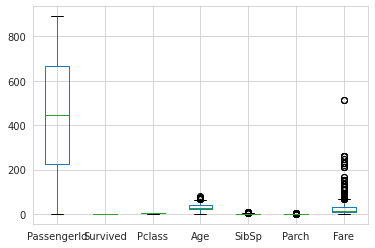

In [ ]:
# box plot fr checking outliers
dataset_train.boxplot()

<AxesSubplot:xlabel='Age'>

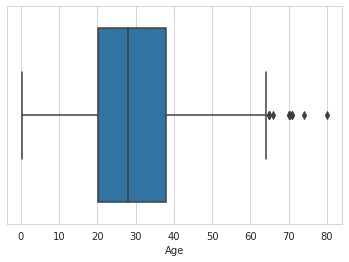

In [ ]:
sns.boxplot(dataset_train['Age'])

In [ ]:
Q1 = dataset_train['Age'].quantile(0.25)
Q3 = dataset_train['Age'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
dataset_train = dataset_train[(dataset_train['Age'] >= Q1 - 1.5*IQR) & (dataset_train['Age'] <= Q3 + 1.5*IQR)]

Filling of null values

In [ ]:
cat=['Survived', 'Sex', 'Pclass', 'Embarked', 'Cabin', 'Name', 'Ticket', 'SibSp','Parch']
 

In [ ]:
num = [col for col in dataset_train.columns if col not in cat]
num

['PassengerId', 'Age', 'Fare']

In [ ]:
cat1=np.array(['Survived', 'Sex', 'Pclass', 'Embarked', 'Cabin', 'Name', 'Ticket', 'SibSp','Parch'])
for cat in cat1:
    dataset_train[cat] =  dataset_train[cat].fillna(dataset_train[cat].mode()[0])
    

In [ ]:
num1=np.array(['PassengerId', 'Age', 'Fare'])
for num_col in num:
    dataset_train[num_col]=dataset_train[num_col].fillna(dataset_train[num_col].median())

In [ ]:
dataset_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

converting categorical to numerical values

In [ ]:
dataset_train["Sex"] = dataset_train["Sex"].replace({"male": 0, "female": 1})
dataset_train["Embarked"] =dataset_train["Embarked"].replace({"S": 0, "C": 1, "Q": 2})


Feature Engineering(Feature Selection)

In [ ]:
dataset_train['FamilyMembers'] = dataset_train['SibSp'] + dataset_train['Parch'] + 1

In [ ]:
dataset_train.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
dataset_train=pd.concat([dataset_train],axis=1)

In [ ]:
dataset_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyMembers
0,0,3,0,22.0,1,0,7.2500,0,2
1,1,1,1,38.0,1,0,71.2833,1,2
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,2
4,0,3,0,35.0,0,0,8.0500,0,1


In [ ]:
dataset_train.dtypes

Survived           int64
Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked           int64
FamilyMembers      int64
dtype: object

In [ ]:
# Separate the target variable from the input features
y = dataset_train['Survived']
X = dataset_train.drop('Survived', axis=1)

In [ ]:
# Split the data into training and validation sets
train_size = int(len(dataset_train) * 0.7) # 70% of the data is used for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print the size of each set
print('Training data:', len(X_train))
print('test data:', len(X_test))

Training data: 492
test data: 211


    len(dataset_train) calculates the number of rows in the DataFrame, which is 0.7 represents the percentage of data that we want to include in the training set, which is 70%.

    len(dataset_train) * 0.7 calculates the number of rows that we want to include in the training set, which is 70% of 100, or 70 rows.

    int() converts the result to an integer, which is necessary because we cannot have a fractional number of rows in the training set.

    train_size is assigned the value of 70, which represents the number of rows that should be included in the training set.

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyMembers
0,3,0,22.0,1,0,7.2500,0,2
1,1,1,38.0,1,0,71.2833,1,2
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,2
4,3,0,35.0,0,0,8.0500,0,1


In [ ]:
X_train.dtypes

Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked           int64
FamilyMembers      int64
dtype: object

Standardization of Data(By standardizing the numerical features in the training set, we are ensuring that each feature has the same scale and is centered around 0. )

In [ ]:
import numpy as np

class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None
        
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        
    def transform(self, X):
        return (X - self.mean_) / self.std_
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


The __init__ method initializes the class instance and sets the mean and standard deviation attributes to None.

The fit method takes in a dataset X and computes the mean and standard deviation of each feature in the dataset. These values are stored in the self.mean_ and self.std_ attributes.

The transform method takes in a dataset X and applies the standardization formula to each feature using the mean and standard deviation values stored in self.mean_ and self.std_. The resulting standardized dataset is returned.

The fit_transform method combines the fit and transform methods into a single method that first computes the mean and standard deviation of the dataset and then standardizes the dataset using those values. The standardized dataset is returned.

In [ ]:
num_cols = ['Age', 'Fare', 'SibSp','Parch']
x_train_num = dataset_train[num_cols]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training set
scaler.fit(x_train_num)

# Scale the numerical features in the training set
dataset_train[num_cols] = scaler.transform(x_train_num)




the num_cols list contains the names of four numerical columns in the dataset_train DataFrame: 'Age', 'Fare', 'SibSp', and 'Parch'.

The next line creates a new DataFrame x_train_num containing only these columns from dataset_train.

A StandardScaler instance is then created, and the fit method is called on x_train_num to compute the mean and standard deviation of each feature.

Finally, the transform method is called on x_train_num to scale the data using the mean and standard deviation computed in the previous step. The scaled data is then assigned back to the corresponding columns in the dataset_train DataFrame.

In [ ]:
X_train.shape

(492, 8)

In [ ]:
X_train.dtypes

Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked           int64
FamilyMembers      int64
dtype: object

In [ ]:
X_test.dtypes

Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked           int64
FamilyMembers      int64
dtype: object

In [693]:
def sigmoid(x):
        return 1 / (1 + np.exp(-x))

def binary_cross_entropy(y_true, y_pred):
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()


In [694]:
class NeuralNetwork:
    def __init__(self, num_features):
        self.weights1 = np.random.rand(6, num_features)
        self.weights2 = np.random.rand(1, 6)
  

    def forward(self, X):
        self.hidden_layer = sigmoid(np.dot(X, self.weights1.T))
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.weights2.T))
        return self.output_layer
    
    def train(self, X_train, y_train, lr, epochs):
        y_train = y_train.values.reshape(-1, 1)  # convert to numpy array and reshape
        for i in range(epochs):
            # forward propagation
            output = self.forward(X_train)

            # calculate error
            error = y_train - output

            # backpropagation
            output_derivative = output * (1 - output)
            hidden_layer_derivative = self.hidden_layer * (1 - self.hidden_layer)
            delta2 = error * output_derivative
            delta1 = np.dot(delta2, self.weights2) * hidden_layer_derivative

            # update weights
            self.weights2 += lr * np.dot(delta2.T, self.hidden_layer)
            self.weights1 += lr * np.dot(delta1.T, X_train)



In [695]:
nn = NeuralNetwork(num_features=8)
nn.train(X_train, y_train, lr=0.01, epochs=1200)

In [696]:
# make predictions on test data
y_pred = nn.forward(X_test)

# convert predictions to binary (0 or 1) using a threshold value of 0.5
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# compare predictions to actual labels and calculate accuracy
accuracy = np.mean(y_pred_binary == y_test.values.reshape(-1, 1))
print('Test accuracy:', accuracy)


Test accuracy: 0.7535545023696683
